# Database setup

In [99]:
!pip install python-dotenv
!pip install pandas
!pip install faker
!pip install beautifulsoup4 rake-nltk
!pip install wordcloud
!pip install gower
!pip install scikit-learn
!pip install networkx
!pip install matplotlib


  Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)


In [3]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
from appwrite.client import Client
from appwrite.services.databases import Databases
from appwrite.id import ID
from dotenv import load_dotenv
import os

load_dotenv()

True

##### Library for natural language processing

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/rafxtgt/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
client = Client()
client.set_endpoint(os.getenv('APPWRITE_API_ENDPOINT'))
client.set_project(os.getenv('APPWRITE_PROJECT'))
client.set_key(os.getenv('APPWRITE_API_KEY'))

In [7]:
databases = Databases(client)
database_name = 'fire-sale-db'

In [8]:
try:
    # Try to get the database to see if it exists
    database_list = databases.list()
    existing_db = next((db for db in database_list['databases'] if db['name'] == database_name), None)
    
    if existing_db:
        fireSaleDb = existing_db
        print(f"Database '{database_name}' already exists with ID: {existing_db['$id']}")
    else:
        # Create the database if it doesn't exist
        fireSaleDb = databases.create(
            database_id=ID.unique(),
            name=database_name
        )
        print(f"Created new database '{database_name}' with ID: {fireSaleDb['$id']}")
except Exception as e:
    print(f"Error initializing database: {e}")
    raise

Database 'fire-sale-db' already exists with ID: 6812c6490009447d68d4


In [10]:
fireSaleDb

{'$id': '6812c6490009447d68d4',
 'name': 'fire-sale-db',
 '$createdAt': '2025-05-01T00:54:33.779+00:00',
 '$updatedAt': '2025-05-01T00:54:33.779+00:00',
 'enabled': True,
 'policies': [],
 'archives': []}

#### User Profile Collectin

In [10]:
userProfileCollection = None

def prepare_user_profile_collection():
  global userProfileCollection
  try:
    collections = databases.list_collections(database_id=fireSaleDb['$id'])
    for collection in collections['collections']:
        if collection['name'] == 'user-profile':
            userProfileCollection = collection
            print("User profile collection already exists")
            return
  except Exception as e:
    print(f"Error checking for existing collection: {e}")
      
    
  userProfileCollection = databases.create_collection(
    database_id=fireSaleDb['$id'],
    collection_id=ID.unique(),
    name='user-profile'
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=userProfileCollection['$id'],
    key='user_id',
    size=255,
    required=True
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=userProfileCollection['$id'],
    key='name',
    size=255,
    required=False
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=userProfileCollection['$id'],
    key='email',
    size=255,
    required=False
  )
    
  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=userProfileCollection['$id'],
    key='label',
    size=255,
    required=True
  )
    
  databases.create_integer_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=userProfileCollection['$id'],
    key='age',
    required=False,
    min=18,
    max=150
  )
    
  databases.create_datetime_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=userProfileCollection['$id'],
    key='signup_date',
    required=True
  )
  print("User profile collection created successfully !")


#### Social Media Collection

In [11]:
socialMediaCollection = None

def prepare_social_media_collection():
    global socialMediaCollection

    try:
        collections = databases.list_collections(database_id=fireSaleDb['$id'])
        for collection in collections['collections']:
            if collection['name'] == 'social-media':
                socialMediaCollection = collection
                print("Social media collection already exists")
                return
    except Exception as e:
        print(f"Error checking for existing collection: {e}")
    
    # If collection doesn't exist, create it
    socialMediaCollection = databases.create_collection(
        database_id=fireSaleDb['$id'],
        collection_id=ID.unique(),
        name='social-media'
    )

    # Create all the attributes
    databases.create_string_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='guid',
        size=255,
        required=True
    )
        
    databases.create_string_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='user_id',
        size=255,
        required=False
    )

    databases.create_string_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='platform',
        size=255,
        required=False
    )

    databases.create_integer_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='post_count',
        required=False,
        min=0
    )  

    databases.create_integer_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='like_count',
        required=False,
        min=0
    )  

    databases.create_string_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='groups',
        required=False, 
        size=131072
    )    
        
    databases.create_integer_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='follower_count',
        required=False,
        min=0
    ) 
        
    databases.create_string_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='top_interests',
        required=False, 
        size=131072
    )  
        
    databases.create_datetime_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key='last_active',
        required=True
    )
    
    print("Created new social media collection")

#### Communication Collection

In [12]:
communicationCollection = None

def prepare_communication_collection():
  global communicationCollection
  try:
    collections = databases.list_collections(database_id=fireSaleDb['$id'])
    for collection in collections['collections']:
        if collection['name'] == 'communication':
            communicationCollection = collection
            print("Communication collection already exists")
            return
  except Exception as e:
    print(f"Error checking for existing collection: {e}")
    

  communicationCollection = databases.create_collection(
    database_id=fireSaleDb['$id'],
    collection_id=ID.unique(),
    name='communication'
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=communicationCollection['$id'],
    key='guid',
    size=255,
    required=True
  )
    
  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=communicationCollection['$id'],
    key='user_id',
    size=255,
    required=False
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=communicationCollection['$id'],
    key='medium',
    size=255,
    required=False
  )
    
  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=communicationCollection['$id'],
    key='contacted_user_id',
    size=255,
    required=False
  )

  databases.create_integer_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=communicationCollection['$id'],
    key='interaction_count',
    required=False,
    min=0
  )  

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=communicationCollection['$id'],
    key='topics',
    required=False, 
    size=131072
  )    
    
  databases.create_datetime_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=communicationCollection['$id'],
    key='last_contact_date',
    required=False
  )
  print("Communication collection created successfully !")


#### Location Collection

In [13]:
locationCollection = None

def prepare_location_collection():
  global locationCollection
  try:
    collections = databases.list_collections(database_id=fireSaleDb['$id'])
    for collection in collections['collections']:
        if collection['name'] == 'location':
            locationCollection = collection
            print("Location collection already exists")
            return
  except Exception as e:
    print(f"Error checking for existing collection: {e}")

    
  locationCollection = databases.create_collection(
    database_id=fireSaleDb['$id'],
    collection_id=ID.unique(),
    name='location'
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=locationCollection['$id'],
    key='guid',
    size=255,
    required=True
  )
    
  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=locationCollection['$id'],
    key='user_id',
    size=255,
    required=False
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=locationCollection['$id'],
    key='location_name',
    size=255,
    required=False
  )
    
  databases.create_float_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=locationCollection['$id'],
    key='latitude',
    required=False
  )
    
  databases.create_float_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=locationCollection['$id'],
    key='longitude',
    required=False
  )
   
  databases.create_datetime_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=locationCollection['$id'],
    key='check_in_time',
    required=False
  )
    
  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=locationCollection['$id'],
    key='companions',
    required=False, 
    size=131072
  )
  print("Location collection created successfully !")

    

#### Behavioral Metadata

In [14]:
behaviorMetadataCollection = None

def prepare_behaviour_metadata_collection():
  global behaviorMetadataCollection
  try:
    collections = databases.list_collections(database_id=fireSaleDb['$id'])
    for collection in collections['collections']:
        if collection['name'] == 'behavioral-metadata':
            behaviorMetadataCollection = collection
            print("Behavioral metadata collection already exists")
            return
  except Exception as e:
    print(f"Error checking for existing collection: {e}")

  behaviorMetadataCollection = databases.create_collection(
    database_id=fireSaleDb['$id'],
    collection_id=ID.unique(),
    name='behavioral-metadata'
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=behaviorMetadataCollection['$id'],
    key='guid',
    size=255,
    required=True
  )
    
  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=behaviorMetadataCollection['$id'],
    key='user_id',
    size=255,
    required=False
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=behaviorMetadataCollection['$id'],
    key='device_type',
    size=255,
    required=False
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=behaviorMetadataCollection['$id'],
    key='active_hours',
    size=255,
    required=False
  )
      
  databases.create_float_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=behaviorMetadataCollection['$id'],
    key='average_daily_screen_time',
    required=False
  )

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=behaviorMetadataCollection['$id'],
    key='preferred_app_categories',
    required=False, 
    size=131072
  )
  print("Behavioral metadata collection created successfully !")


#### InferredProfile

In [15]:
inferredProfileCollection = None

def prepare_inferred_profile_collection():
  global inferredProfileCollection
  try:
    collections = databases.list_collections(database_id=fireSaleDb['$id'])
    for collection in collections['collections']:
        if collection['name'] == 'inferred-profile':
            inferredProfileCollection = collection
            print("Inferred profile collection already exists")
            return
  except Exception as e:
    print(f"Error checking for existing collection: {e}")

  inferredProfileCollection = databases.create_collection(
    database_id=fireSaleDb['$id'],
    collection_id=ID.unique(),
    name='inferred-profile'
  )
    
  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=inferredProfileCollection['$id'],
    key='user_id',
    size=255,
    required=False
  )

  databases.create_float_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=inferredProfileCollection['$id'],
    key='influence_score',
    required=False
  )

    
  databases.create_float_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=inferredProfileCollection['$id'],
    key='trust_score',
    required=False
  )


  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=inferredProfileCollection['$id'],
    key='hidden_roles',
    required=False, 
    size=131072
  )  

  databases.create_string_attribute(
    database_id=fireSaleDb['$id'],
    collection_id=inferredProfileCollection['$id'],
    key='hidden_communities',
    required=False, 
    size=131072
  )  
  print("Inferred profile collection created successfully !")


#### Create the database collections

In [14]:
def add_new_string_attribute(attribute_name: str, size: int = 255, required: bool = False):
    global socialMediaCollection
    
    if not socialMediaCollection:
        raise Exception("Social media collection not initialized. Call prepare_social_media_collection() first.")
    
    # Check if attribute already exists
    existing_attributes = databases.list_attributes(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id']
    )['attributes']
    
    if any(attr['key'] == attribute_name for attr in existing_attributes):
        print(f"Attribute '{attribute_name}' already exists")
        return
    
    # Create new string attribute
    databases.create_string_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=socialMediaCollection['$id'],
        key=attribute_name,
        size=size,
        required=required
    )
    print(f"Added new attribute '{attribute_name}'")

In [45]:
add_new_string_attribute("work_exp", size=131072)

Added new attribute 'work_exp'


In [16]:
if __name__ == "__main__":
  prepare_user_profile_collection()
  prepare_social_media_collection()
  prepare_communication_collection()
  prepare_location_collection()
  prepare_behaviour_metadata_collection()
  prepare_inferred_profile_collection()

User profile collection already exists
Social media collection already exists
Communication collection already exists
Location collection already exists
Behavioral metadata collection already exists
Inferred profile collection already exists


In [29]:
result = databases.delete(
    database_id = '680fc5380017320a8568'
)

# Data Processing

#### Create synthetic user profile data csv from the pseudo file

In [10]:
import pandas as pd
from datetime import datetime
from faker import Faker
import uuid

# Initialize Faker generator
fake = Faker()
Faker.seed(42)  # For reproducible results

# Read the CSV file
df = pd.read_csv('dataset/pseudo_facebook.csv')

# Calculate current year and user age
current_year = datetime.now().year
df['user_age'] = current_year - df['dob_year']
df['label'] = 'NODE'

# Generate unique synthetic data
num_rows = len(df)
unique_names = set()
unique_emails = set()

while len(unique_names) < num_rows:
    unique_names.add(fake.unique.name())

while len(unique_emails) < num_rows:
    unique_emails.add(fake.unique.email())

# Add the synthetic columns
df['name'] = list(unique_names)
df['email'] = list(unique_emails)
df['user_guid'] = [str(uuid.uuid4()) for _ in range(len(df))]

# Verify uniqueness
# print(f"Unique names generated: {len(df['name'].unique()) == len(df)}")
# print(f"Unique emails generated: {len(df['email'].unique()) == len(df)}")

# Display the DataFrame with new age column

selected_columns = ['user_guid', 'name', 'email', 'label', 'user_age']  
new_df = df[selected_columns]
print(new_df.head())
new_df.to_csv('dataset/synthetic_user_profile_data.csv', index=False)

print(f"New CSV created with columns: {selected_columns}")

                              user_guid            name  \
0  6c9799d2-dac3-4098-8fd3-1d0f7ae138bb  Jennifer Blair   
1  186648a5-0093-46a1-8932-b696aeb8ed09   Alfred Cooper   
2  1a3965d4-ccfb-4a8f-827a-8585a7ad1dc1     Debra Cohen   
3  c39101b7-5518-4105-9072-0ba3a1abb1ca   Helen Holland   
4  16741755-a8b9-4f5e-883b-4372fa0795bd   Monica Hansen   

                          email label  user_age  
0            troy75@example.org  NODE        26  
1          pamela72@example.com  NODE        26  
2      villamichael@example.org  NODE        26  
3  hendersonstephen@example.com  NODE        26  
4           mclarke@example.org  NODE        26  
New CSV created with columns: ['user_guid', 'name', 'email', 'label', 'user_age']


#### Create a smaller file for user interaction from facebook

In [4]:
import pandas as pd

# Replace 'your_file.csv' with your actual file path
file_path = 'dataset/fbpac-ads-en-US.csv'

# Read the CSV file
df = pd.read_csv(file_path)
headers = df.columns.tolist()

# Display the first 5 rows with headers
df.head()
print(headers)

['id', 'html', 'political', 'not_political', 'title', 'message', 'thumbnail', 'created_at', 'updated_at', 'lang', 'images', 'impressions', 'political_probability', 'targeting', 'suppressed', 'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings', 'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba']


In [6]:
import pandas as pd

# Read original CSV
file_path = 'dataset/fbpac-ads-en-US.csv'

df = pd.read_csv(file_path)

# Select columns you want to keep (adjust names as needed)
selected_columns = ['title', 'message', 'advertiser', 'entities', 'page']  

# Create new DataFrame with only selected columns
new_df = df[selected_columns]

# Save to new CSV
new_df.to_csv('dataset/compressed_ad_data.csv', index=False)

print(f"New CSV created with columns: {selected_columns}")

New CSV created with columns: ['title', 'message', 'advertiser', 'entities', 'page']


#### Add the consumer_type attribute

In [83]:
databases.create_string_attribute(
        database_id=fireSaleDb['$id'],
        collection_id=userProfileCollection['$id'],
        key='consumer_type',
        size=100,
        required=False
    )

AppwriteException: Attribute with the requested key already exists. Attribute keys must be unique, try again with a different key.

#### Update consumer type to 'INDIVIDUAL_CONSUMER' 

In [47]:
from appwrite.query import Query

def get_all_documents():
    """Retrieve all documents from a collection with pagination"""
    all_documents = []
    offset = 0
    limit = 500  # Number of documents per request
    
    while True:
        try:
            # Get documents with pagination using Query
            result = databases.list_documents(
                database_id=fireSaleDb['$id'],
                collection_id=userProfileCollection['$id'],
                queries=[
                    Query.limit(limit),
                    Query.offset(offset)
                ]
            )
            
            if not result['documents']:
                break  # No more documents
                
            all_documents.extend(result['documents'])
            total_documents = result['total']
            offset += len(result['documents'])
            
            print(f"Fetched {len(all_documents)}/{total_documents} documents...")
            
            # Exit if we've got all documents
            if len(all_documents) >= total_documents:
                break
                
        except Exception as e:
            print(f"Error fetching documents: {str(e)}")
            break
    
    print(f"\nSuccessfully retrieved {len(all_documents)} documents")
    return all_documents

def update_all_consumer_types():
    # First ensure the attribute exists
    try:
        databases.create_string_attribute(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id'],
            key='consumer_type',
            size=50,
            required=False
        )
        print("Created consumer_type attribute")
    except Exception as e:
        print(f"Attribute may already exist: {str(e)}")

    # Get all documents
    all_documents = get_all_documents()
    
    # Update all documents
    success_count = 0
    for doc in all_documents:
        try:
            databases.update_document(
                database_id=fireSaleDb['$id'],
                collection_id=userProfileCollection['$id'],
                document_id=doc['$id'],
                data={'consumer_type': 'INDIVIDUAL_CONSUMER'}
            )
            success_count += 1
            if success_count % 100 == 0:
                print(f"Updated {success_count} documents...")
        except Exception as e:
            print(f"Error updating document {doc['$id']}: {str(e)}")
    
    print(f"\nSuccessfully updated {success_count}/{len(all_documents)} documents")
    return success_count

# Execute the update
# update_all_consumer_types()

In [48]:
print(get_all_documents())

Fetched 500/1500 documents...
Fetched 1000/1500 documents...
Fetched 1500/1500 documents...

Successfully retrieved 1500 documents
[{'user_id': '6c9799d2-dac3-4098-8fd3-1d0f7ae138bb', 'name': 'Jennifer Blair', 'email': 'troy75@example.org', 'label': 'NODE', 'age': 26, 'signup_date': '2025-05-01T07:04:01.888+00:00', 'consumer_type': 'INDIVIDUAL_CONSUMER', '$id': '6812c8810035149a8400', '$createdAt': '2025-05-01T01:04:02.248+00:00', '$updatedAt': '2025-05-01T16:29:00.377+00:00', '$permissions': [], '$databaseId': '6812c6490009447d68d4', '$collectionId': '6812c6db000500ec4de7'}, {'user_id': '186648a5-0093-46a1-8932-b696aeb8ed09', 'name': 'Alfred Cooper', 'email': 'pamela72@example.com', 'label': 'NODE', 'age': 26, 'signup_date': '2025-05-01T07:04:02.450+00:00', 'consumer_type': 'INDIVIDUAL_CONSUMER', '$id': '6812c882002a6b94d7f6', '$createdAt': '2025-05-01T01:04:02.748+00:00', '$updatedAt': '2025-05-01T16:29:00.892+00:00', '$permissions': [], '$databaseId': '6812c6490009447d68d4', '$colle

#### Twitter interaction data csv

In [47]:
import pandas as pd

# Read original CSV
file_path_ = 'dataset/twitter_dataset_1.csv'

# Try different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin1')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Rename columns
new_columns = ['label', 'user_id', 'post_date', 'type', 'user_name', 'tweet']
if len(df.columns) == len(new_columns):
    df.columns = new_columns  # Rename all columns at once
else:
    print("Warning: Column count does not match. Keeping original column names.")

selected_columns = ['tweet', 'label']  
tweet_df_1 = df[selected_columns]
print(tweet_df_1.head())
print("Total number of rows:", tweet_df_1.shape[0])

# # Display results
# print("\nFirst 5 rows:")
# print(df.head())

# print("\nColumn headers:")
# print(df.columns.tolist())

# print("\nNumber of columns:", len(df.columns))
# print("Total number of rows:", df.shape[0])

                                               tweet  label
0  is upset that he can't update his Facebook by ...      0
1  @Kenichan I dived many times for the ball. Man...      0
2    my whole body feels itchy and like its on fire       0
3  @nationwideclass no, it's not behaving at all....      0
4                      @Kwesidei not the whole crew       0
Total number of rows: 1599999


In [48]:
import pandas as pd

# Read original CSV
file_path_d1 = 'dataset/twitter_dataset_2.csv'
selected_columns = ['tweet', 'label']  

df1 = pd.read_csv(file_path_d1)
tweet_df_2 = df1[selected_columns]

# print(df1.head())
print(tweet_df_2.head())
print("Total number of rows:", tweet_df_2.shape[0])


                                               tweet  label
0  just had a real good moment. i missssssssss hi...      0
1         is reading manga  http://plurk.com/p/mzp1e      0
2  @comeagainjen http://twitpic.com/2y2lx - http:...      0
3  @lapcat Need to send 'em to my accountant tomo...      0
4      ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
Total number of rows: 10314


In [49]:
import pandas as pd

# Concatenate the two DataFrames vertically (row-wise)
combined_df = pd.concat([tweet_df_2, tweet_df_1], ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('dataset/combined_tweets.csv', index=False)  # index=False avoids saving an extra index column

print(f"Combined DataFrame shape: {combined_df.shape}")
print("CSV file saved as 'combined_tweets.csv'")

Combined DataFrame shape: (1610313, 2)
CSV file saved as 'combined_tweets.csv'


#### LinkedIn User profile and company data csv

In [2]:
import pandas as pd

# Read original CSV
file_path_d1 = 'dataset/LinkedIn_people_profiles_datasets.csv'

df1 = pd.read_csv(file_path_d1)

# print(df1.head())
print(df1.head())
print("Total number of rows:", df1.shape[0])
print("\nColumn headers:")
print(df1.columns.tolist())

    timestamp                            id  \
0  2023-01-10            catherinemcilkenny   
1  2022-12-17           margot-bon-51a04624   
2  2023-05-17            mike-dean-8509a193   
3  2022-05-29  giovanna-panarella-99a0a4167   
4  2022-12-06         steve-latimer-3364327   

                                     name                       city  \
0  Catherine Fitzpatrick (McIlkenny), B.A                     Canada   
1                              Margot Bon  The Randstad, Netherlands   
2                               Mike Dean    England, United Kingdom   
3                      Giovanna Panarella  Avellino, Campania, Italy   
4                           Steve Latimer            Ontario, Canada   

  country_code region     current_company:company_id  \
0           CA    NaN                            NaN   
1           NL     EU               gemeente-utrecht   
2           UK    NaN                   network-rail   
3           IT     EU                            NaN   
4   

In [9]:
df1['current_company_name'] = df1['current_company:name']
selected_columns = ['current_company_name', 'position', 'about', 'posts', 'groups', 'experience', 'educations_details']
linkedIn_df = df1[selected_columns]
print(linkedIn_df.head())
linkedIn_df.to_csv('dataset/linkedin_user_profile.csv', index=False)


            current_company_name  \
0                            NaN   
1               Gemeente Utrecht   
2                   Network Rail   
3                      Freelance   
4  Mid-Range Computer Group Inc.   

                                            position  \
0  Snr Business Analyst at Emploi et Développemen...   
1  Communicatieadviseur Corporate & Strategie Gem...   
2               Network Data Manager at Network Rail   
3                             Architetto (Freelance)   
4  Senior Account Executive at Mid-Range Computer...   

                                               about  \
0                                                NaN   
1  Allround Marketing & Communicatie Adviseur met...   
2  Experienced Data Manager with a demonstrated h...   
3                                                NaN   
4                                                NaN   

                                               posts  \
0  [{"attribution":"Liked by Catherine Fitzpatric... 

#### LinkedIn company profile

In [15]:
import pandas as pd

# Read original CSV
file_path_d1 = 'dataset/linkedin_company_profile.csv'

df1 = pd.read_csv(file_path_d1)

# print(df1.head())
# print(df1.head())
print("Total number of rows:", df1.shape[0])
print("\nColumn headers:")
print(df1.columns.tolist())
selected_columns = ['name', 'industries', 'specialties', 'about', 'organization_type']
linkedIn_comp_df = df1[selected_columns]
print(linkedIn_comp_df.head())
linkedIn_comp_df.to_csv('dataset/linkedin_comp_profile.csv', index=False)


Total number of rows: 1000

Column headers:
['timestamp', 'id', 'name', 'country_code', 'locations', 'formatted_locations', 'followers', 'employees_in_linkedin', 'about', 'specialties', 'company_size', 'organization_type', 'industries', 'website', 'crunchbase_url', 'founded', 'company_id', 'employees', 'headquarters', 'image', 'logo', 'similar', 'sphere', 'url', 'type', 'updates', 'slogan', 'affiliated', 'funding', 'stock_info', 'investors']
                                        name  \
0  Be Nijs * Business- & Concept Development   
1             Texas Deaf Chamber of Commerce   
2                                CellPraxis®   
3                        DIAMOND TOOLS PLANT   
4                            Thieves Kitchen   

                           industries  \
0    Business Consulting and Services   
1      Civic and Social Organizations   
2              Biotechnology Research   
3  Industrial Machinery Manufacturing   
4                    Media Production   

                  

### Data Aggregation

In [34]:
import pandas as pd

# Read the CSV file
user_profile_df = pd.read_csv('dataset/synthetic_user_profile_data.csv')
print(user_profile_df.head())
print("\nColumn headers:")
print(user_profile_df.columns.tolist())
print("Total number of rows:", user_profile_df.shape[0])


                              user_guid            name  \
0  6c9799d2-dac3-4098-8fd3-1d0f7ae138bb  Jennifer Blair   
1  186648a5-0093-46a1-8932-b696aeb8ed09   Alfred Cooper   
2  1a3965d4-ccfb-4a8f-827a-8585a7ad1dc1     Debra Cohen   
3  c39101b7-5518-4105-9072-0ba3a1abb1ca   Helen Holland   
4  16741755-a8b9-4f5e-883b-4372fa0795bd   Monica Hansen   

                          email label  user_age  
0            troy75@example.org  NODE        26  
1          pamela72@example.com  NODE        26  
2      villamichael@example.org  NODE        26  
3  hendersonstephen@example.com  NODE        26  
4           mclarke@example.org  NODE        26  

Column headers:
['user_guid', 'name', 'email', 'label', 'user_age']
Total number of rows: 99003


#### Push first 500 rows into user profile dataframe

In [36]:
from datetime import datetime
import pandas as pd

def upload_user_profiles(df, limit=500):
    # Take the first 500 rows
    subset = df.head(limit)
    
    # Prepare the collection if not already prepared
    if userProfileCollection is None:
        prepare_user_profile_collection()
    
    # Initialize counters
    success_count = 0
    error_count = 0
    
    # Iterate through each row and create document
    for index, row in subset.iterrows():
        try:
            # Map the CSV columns to our collection attributes
            document_data = {
                'user_id': row['user_guid'],
                'name': row['name'],
                'email': row['email'],
                'label': row['label'],
                'age': int(row['user_age']) if pd.notna(row['user_age']) else None,
                'signup_date': datetime.now().isoformat()  # Using current time as signup date
            }
            
            # Create the document in Appwrite
            result = databases.create_document(
                database_id=fireSaleDb['$id'],
                collection_id=userProfileCollection['$id'],
                document_id=ID.unique(),
                data=document_data
            )
            
            success_count += 1
            if success_count % 50 == 0:  # Print progress every 50 records
                print(f"Processed {success_count} records...")
                
        except Exception as e:
            error_count += 1
            print(f"Error processing row {index}: {str(e)}")
            continue
    
    print(f"\nUpload completed with {success_count} successes and {error_count} errors.")

In [37]:
# Load your CSV data
user_profile_df = pd.read_csv('dataset/synthetic_user_profile_data.csv')

# Upload the first 500 rows
upload_user_profiles(user_profile_df, 500)

Processed 50 records...
Processed 100 records...
Processed 150 records...
Processed 200 records...
Processed 250 records...
Processed 300 records...
Processed 350 records...
Processed 400 records...
Processed 450 records...
Processed 500 records...

Upload completed with 500 successes and 0 errors.


#### Using a chunk of linkedin company data as active consumers

In [89]:
import pandas as pd

# Read the CSV file
linkedin_comp_df = pd.read_csv('dataset/linkedin_comp_profile.csv')
print(linkedin_comp_df.head())
print("\nColumn headers:")
print(linkedin_comp_df.columns.tolist())
print("Total number of rows:", linkedin_comp_df.shape[0])


                                        name  \
0  Be Nijs * Business- & Concept Development   
1             Texas Deaf Chamber of Commerce   
2                                CellPraxis®   
3                        DIAMOND TOOLS PLANT   
4                            Thieves Kitchen   

                           industries  \
0    Business Consulting and Services   
1      Civic and Social Organizations   
2              Biotechnology Research   
3  Industrial Machinery Manufacturing   
4                    Media Production   

                                         specialties  \
0  Expansie bedrijfsactiviteiten, Marketing strat...   
1  Business Development, Mentoring, Networking, A...   
2  Saúde, Ciências da vida, Terapia celular, Medi...   
3                                                NaN   
4  On Air Promos, Idents, Commercials, B2B Promos...   

                                               about organization_type  
0  Voor Startups, ondernemers en bedrijven die he...  

In [92]:
from datetime import datetime
import pandas as pd
import uuid

# Read the CSV file
linkedin_comp_df = pd.read_csv('dataset/linkedin_comp_profile.csv').head(500)

def create_user_profiles_from_companies(companies_df):
    # Initialize counters
    success_count = 0
    error_count = 0
    
    for index, row in companies_df.iterrows():
        try:
            # Create a document for each company
            document = databases.create_document(
                database_id=fireSaleDb['$id'],
                collection_id=userProfileCollection['$id'],
                document_id=ID.unique(),
                data={
                    'user_id': str(uuid.uuid4()),
                    'name': row['name'],
                    'email': '',  # No email in source data
                    'label': 'CONSUMER',  # Using a fixed label for companies
                    'age': 50,  # Not applicable for companies
                    'signup_date': datetime.now().isoformat(),
                    'consumer_type': 'ORGANIZATION_CONSUMER',
                    
                }
            )
            success_count += 1
            if success_count % 50 == 0:  # Print progress every 50 records
                print(f"Processed {success_count} records...")
        except Exception as e:
            error_count += 1
            print(f"Error processing row {index}: {str(e)}")
            continue

# First ensure the collection exists
# prepare_user_profile_collection()

# Then create the company profiles
create_user_profiles_from_companies(linkedin_comp_df)

Processed 50 records...
Processed 100 records...
Processed 150 records...
Processed 200 records...
Processed 250 records...
Processed 300 records...
Processed 350 records...
Processed 400 records...
Processed 450 records...
Processed 500 records...


#### Using a different chunk of linkedIn data for non active consumer nodes

In [16]:
from datetime import datetime
import pandas as pd
import uuid

# Read the CSV file
linkedin_comp_df = pd.read_csv('dataset/linkedin_comp_profile.csv').tail(500)

def create_user_profiles_from_companies(companies_df):
    # Initialize counters
    success_count = 0
    error_count = 0
    
    for index, row in companies_df.iterrows():
        try:
            # Create a document for each company
            document = databases.create_document(
                database_id=fireSaleDb['$id'],
                collection_id=userProfileCollection['$id'],
                document_id=ID.unique(),
                data={
                    'user_id': str(uuid.uuid4()),
                    'name': row['name'],
                    'email': '',  # No email in source data
                    'label': 'NODE',  # Using a fixed label for companies
                    'age': 50,  # Not applicable for companies
                    'signup_date': datetime.now().isoformat(),
                    'consumer_type': 'ORGANIZATION_CONSUMER',
                    
                }
            )
            success_count += 1
            if success_count % 100 == 0:  # Print progress every 50 records
                print(f"Processed {success_count} records...")
        except Exception as e:
            error_count += 1
            print(f"Error processing row {index}: {str(e)}")
            continue

# First ensure the collection exists
# prepare_user_profile_collection()

# Then create the company profiles
create_user_profiles_from_companies(linkedin_comp_df)

Processed 100 records...
Processed 200 records...
Processed 300 records...
Processed 400 records...
Processed 500 records...


#### Link user profile to the facebook ad data.

In [20]:
import pandas as pd

# Read the CSV file
facebook_ad_df = pd.read_csv('dataset/synthetic_facebook_ad_data.csv')
print(facebook_ad_df.head())
print("\nColumn headers:")
print(facebook_ad_df.columns.tolist())
print("Total number of rows:", facebook_ad_df.shape[0])


                            title  \
0   League of Conservation Voters   
1               Indivisible Guide   
2  International Rescue Committee   
3    Covenant House International   
4              Planned Parenthood   

                                             message  \
0  <p>BREAKING: Trump’s Department of the Interio...   
1  <p>The Mueller investigation is over. Special ...   
2  <p>Zimbabwe is reeling from the impact of Cycl...   
3  <p>What more can you do in the final hours of ...   
4  <p>Say it loud, say it proud: Our rights, our ...   

                     advertiser  \
0                           NaN   
1                           NaN   
2                           NaN   
3  Covenant House International   
4                           NaN   

                                            entities  \
0  [{"entity": "Endangered Species Act", "entity_...   
1  [{"entity": "Americans", "entity_type": "Group...   
2  [{"entity": "Zimbabwe", "entity_type": "Region"}]   
3    

In [41]:
import random
from datetime import datetime, timedelta
import json
from bs4 import BeautifulSoup
from rake_nltk import Rake
import pandas as pd

def extract_message_text(html_content):
    """Extract text from HTML message content"""
    soup = BeautifulSoup(html_content, 'html.parser')
    return soup.get_text(separator=' ', strip=True)

def extract_keywords(text, num_keywords=3):
    """Extract keywords from text using RAKE"""
    r = Rake()
    r.extract_keywords_from_text(text)
    keywords = r.get_ranked_phrases()[:num_keywords]
    return keywords

def get_random_user_ids(count):
    """Get random user IDs from userProfileCollection"""
    user_ids = []
    try:
        # Get list of users (adjust limit as needed)
        users = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id']
        )
        user_ids = [user['user_id'] for user in users['documents']]
    except Exception as e:
        print(f"Error fetching user IDs: {str(e)}")
    
    # If we couldn't fetch users, generate some dummy IDs (fallback)
    if not user_ids:
        print("Couldn't fetch user ids, so using dummy ones !!!")
        user_ids = [f"user_{i}" for i in range(1, 1001)]
    
    return random.choices(user_ids, k=count)

def upload_social_media_data(df, total_records=5000):
    """Upload random social media data with 1:5 user ratio"""
    # Prepare the collection if not already prepared
    if socialMediaCollection is None:
        prepare_social_media_collection()
    
    # Calculate number of users needed (1:5 ratio)
    num_users = total_records // 5
    user_ids = get_random_user_ids(num_users)
    
    # Initialize counters
    success_count = 0
    error_count = 0
    
    # Process records
    for i in range(total_records):
        try:
            # Pick a random row from the dataframe
            random_row = df.sample(n=1).iloc[0]
            
            # Extract message text from HTML
            message_text = extract_message_text(random_row['message'])
            
            # Extract keywords
            keywords = extract_keywords(message_text, random.randint(1, 3))
            
            # Process entities to extract groups and organizations
            entity_list = []
            try:
                entities = json.loads(random_row['entities'])
                for entity_obj in entities:
                    if entity_obj['entity_type'] in ['Group', 'Organization']:
                        entity_value = entity_obj['entity'].lower().strip()
                        if entity_value not in entity_list:  # Avoid duplicates
                            entity_list.append(entity_value)
            except (json.JSONDecodeError, KeyError, AttributeError) as e:
                print(f"Error processing entities for record {i}: {str(e)}")
                entity_list = ["facebook_group"]  # Fallback value
            
            # Create document data
            document_data = {
                'guid': ID.unique(),
                'user_id': user_ids[i // 5],  # Same user for 5 records
                'platform': "Facebook",
                'post_count': random.randint(1, 100),
                'like_count': random.randint(0, 5000),
                'groups': json.dumps({"associated_grps": entity_list}),
                'follower_count': random.randint(0, 10000),
                'top_interests': json.dumps({"keywords": keywords}),
                'last_active': (datetime.now() - timedelta(days=random.randint(0, 30))).isoformat()
            }
            
            # Create the document in Appwrite
            result = databases.create_document(
                database_id=fireSaleDb['$id'],
                collection_id=socialMediaCollection['$id'],
                document_id=ID.unique(),
                data=document_data
            )
            
            success_count += 1
            if success_count % 100 == 0:  # Print progress every 1000 records
                print(f"Processed {success_count} records...")
                
        except Exception as e:
            error_count += 1
            print(f"Error processing record {i}: {str(e)}")
            continue
    
    print(f"\nUpload completed with {success_count} successes and {error_count} errors.")

In [42]:
# Load your CSV data
facebook_ad_df = pd.read_csv('dataset/synthetic_facebook_ad_data.csv')

# Upload the data
upload_social_media_data(facebook_ad_df, 5000)

Error processing record 40: the JSON object must be str, bytes or bytearray, not float
Error processing record 50: the JSON object must be str, bytes or bytearray, not float
Error processing record 55: the JSON object must be str, bytes or bytearray, not float
Error processing record 91: the JSON object must be str, bytes or bytearray, not float
Processed 100 records...
Error processing record 124: the JSON object must be str, bytes or bytearray, not float
Processed 200 records...
Error processing record 222: the JSON object must be str, bytes or bytearray, not float
Error processing record 305: the JSON object must be str, bytes or bytearray, not float
Processed 300 records...
Error processing record 341: the JSON object must be str, bytes or bytearray, not float
Error processing record 356: the JSON object must be str, bytes or bytearray, not float
Processed 400 records...
Error processing record 418: the JSON object must be str, bytes or bytearray, not float
Error processing record 

#### Link user profile to the linkedIn data.

In [43]:
import pandas as pd

# Read the CSV file
linkedin_user_df = pd.read_csv('dataset/linkedin_user_profile.csv')
print(linkedin_user_df.head())
print("\nColumn headers:")
print(linkedin_user_df.columns.tolist())
print("Total number of rows:", linkedin_user_df.shape[0])


            current_company_name  \
0                            NaN   
1               Gemeente Utrecht   
2                   Network Rail   
3                      Freelance   
4  Mid-Range Computer Group Inc.   

                                            position  \
0  Snr Business Analyst at Emploi et Développemen...   
1  Communicatieadviseur Corporate & Strategie Gem...   
2               Network Data Manager at Network Rail   
3                             Architetto (Freelance)   
4  Senior Account Executive at Mid-Range Computer...   

                                               about  \
0                                                NaN   
1  Allround Marketing & Communicatie Adviseur met...   
2  Experienced Data Manager with a demonstrated h...   
3                                                NaN   
4                                                NaN   

                                               posts  \
0  [{"attribution":"Liked by Catherine Fitzpatric... 

In [55]:
import random
import json
from datetime import datetime, timedelta

def process_linkedin_experience(experience_json):
    """Process LinkedIn experience data to extract work experience and industries"""
    try:
        experiences = json.loads(experience_json)
        work_experience = []
        industries = []
        
        for exp in experiences:
            # Extract basic work experience info
            if 'company' in exp and 'positions' in exp and len(exp['positions']) > 0:
                position = exp['positions'][0]  # Take the first position
                work_exp = {
                    'company': exp.get('company', ''),
                    'title': position.get('title', ''),
                    'duration_short': position.get('duration_short', '')
                }
                work_experience.append(work_exp)
                
                # Extract industry if available
                if 'industry' in exp and exp['industry']:
                    industries.append(exp['industry'].lower())
            
        return {
            'work_experience': work_experience,
            'industries': list(set(industries))
        }# Remove duplicates
    except (json.JSONDecodeError, TypeError) as e:
        print(f"Error processing experience data: {str(e)}")
        return {
            'work_experience': [],
            'industries': []
        }

def upload_linkedin_data(df, total_records=1000):
    """Upload LinkedIn user profile data to socialMediaCollection"""
    if socialMediaCollection is None:
        prepare_social_media_collection()
    
    # Get all user IDs once for efficiency
    try:
        users = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id']
        )
        all_user_ids = [user['user_id'] for user in users['documents']]
    except Exception as e:
        print(f"Error fetching user IDs: {str(e)}")
        all_user_ids = [f"user_{i}" for i in range(1, 1001)]
    
    success_count = 0
    error_count = 0
    
    for i in range(total_records):
        try:
            # Pick a random row and user
            random_row = df.sample(n=1).iloc[0]
            user_id = random.choice(all_user_ids)
            
            # Process experience data
            experience_data = process_linkedin_experience(random_row['experience'])
            
            # Process groups (assuming similar format to Facebook groups)
            try:
                groups = json.loads(random_row['groups'])
                group_list = [g.lower().strip() for g in groups if isinstance(g, str)]
                group_list = list(set(group_list))[:10]  # Limit to 10 unique groups
            except:
                group_list = ["linkedin_group"]  # Fallback
            
            # Create document data
            document_data = {
                'guid': ID.unique(),
                'user_id': user_id,
                'platform': "LinkedIn",
                'post_count': random.randint(1, 50),  # LinkedIn typically has fewer posts
                'like_count': random.randint(0, 500),
                'groups': json.dumps({"associated_grps": group_list}),
                'follower_count': random.randint(0, 5000),  # LinkedIn typically has fewer followers
                'top_interests': json.dumps({"keywords": experience_data['industries']}),
                'work_exp': json.dumps({"experience": experience_data['work_experience']}),
                'last_active': (datetime.now() - timedelta(days=random.randint(0, 30))).isoformat()
            }
            
            # Create the document in Appwrite
            result = databases.create_document(
                database_id=fireSaleDb['$id'],
                collection_id=socialMediaCollection['$id'],
                document_id=ID.unique(),
                data=document_data
            )
            
            success_count += 1
            if success_count % 20 == 0:
                print(f"Processed {success_count} LinkedIn profiles...")
                
        except Exception as e:
            error_count += 1
            print(f"Error processing record {i}: {str(e)}")
            continue
    
    print(f"\nLinkedIn upload completed: {success_count} successes, {error_count} errors")
    return success_count


In [56]:
# Load your LinkedIn data
linkedin_user_df = pd.read_csv('dataset/linkedin_user_profile.csv')

# Upload the data (first 1000 records)
upload_linkedin_data(linkedin_user_df, 1000)

Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Processed 20 LinkedIn profiles...
Processed 40 LinkedIn profiles...
Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Processed 60 LinkedIn profiles...
Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Error processing experience data: the JSON object must be str, bytes or bytearray, not float
Processed 80 LinkedIn profiles...
Error processing experience

1000

### Social media data for company profiles

In [18]:
import pandas as pd
from datetime import datetime
import random
import json
from appwrite.id import ID
from appwrite.query import Query
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def extract_keywords(text):
    if pd.isna(text):
        return []
    
    # Tokenize and clean text
    tokens = word_tokenize(str(text).lower())
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]
    
    # Get unique keywords
    keywords = list(set(tokens))
    return keywords[:20]  # Limit to top 20 keywords

def get_user_id_by_name(name):
    try:
        # Search for user in userProfileCollection by name
        users = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id'],
            queries=[Query.equal('name', name)]
        )
        if users['total'] > 0:
            return users['documents'][0]['user_id']
        return None
    except Exception as e:
        print(f"Error finding user {name}: {str(e)}")
        return None

def create_social_media_profiles(companies_df, count=500):
    # Ensure collection exists
    prepare_social_media_collection()
    
    # Randomly sample rows
    sampled_df = companies_df.sample(n=min(count, len(companies_df)))
    success_count = 0
    error_count = 0

    for index, row in sampled_df.iterrows():
        try:
            # Find matching user_id
            user_id = get_user_id_by_name(row['name'])
            
            # Extract keywords from specialties and about
            specialties_keywords = extract_keywords(row.get('specialties', ''))
            about_keywords = extract_keywords(row.get('about', ''))
            all_keywords = list(set(specialties_keywords + about_keywords))
            
            # Create social media document
            document = databases.create_document(
                database_id=fireSaleDb['$id'],
                collection_id=socialMediaCollection['$id'],
                document_id=ID.unique(),
                data={
                    'guid': str(uuid.uuid4()),
                    'user_id': user_id,
                    'platform': 'LinkedIn',
                    'post_count': random.randint(10, 1000),
                    'like_count': random.randint(100, 10000),
                    'groups': json.dumps([]),  # Empty array as string
                    'follower_count': random.randint(100, 50000),
                    'top_interests': json.dumps({'keywords': all_keywords}),
                    'last_active': datetime.now().isoformat()
                }
            )
            success_count += 1
            if success_count % 100 == 0:
                print(f"Processed {success_count} LinkedIn profiles...")
                
        except Exception as e:
            error_count += 1
            print(f"Error processing record {i}: {str(e)}")
            continue


[nltk_data] Downloading package punkt to /home/rafxtgt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rafxtgt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rafxtgt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Social media collection already exists
Processed 100 LinkedIn profiles...
Processed 200 LinkedIn profiles...
Processed 300 LinkedIn profiles...
Processed 400 LinkedIn profiles...
Processed 500 LinkedIn profiles...


##### First 500 companies as active consumers for social media data

In [ ]:
# Load the data
linkedin_comp_df = pd.read_csv('dataset/linkedin_comp_profile.csv').head(500)

# Create social media profiles for 500 random companies
create_social_media_profiles(linkedin_comp_df, 500)

##### Last 500 companies as nodes for social media data

In [19]:
# Load the data
linkedin_comp_df = pd.read_csv('dataset/linkedin_comp_profile.csv').tail(500)

# Create social media profiles for 500 random companies
create_social_media_profiles(linkedin_comp_df, 500)

Social media collection already exists
Processed 100 LinkedIn profiles...
Processed 200 LinkedIn profiles...
Processed 300 LinkedIn profiles...
Processed 400 LinkedIn profiles...
Processed 500 LinkedIn profiles...


### Construct communication data

In [57]:
import pandas as pd

# Read the CSV file
email_df = pd.read_csv('dataset/emails.csv')
print(email_df.head())
print("\nColumn headers:")
print(email_df.columns.tolist())
print("Total number of rows:", email_df.shape[0])


                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...

Column headers:
['file', 'message']
Total number of rows: 517401


In [61]:
# Select a specific row's message (for example, row index 0)
row_index = 8900 # Change this to the row index you want to inspect
message_content = email_df.loc[row_index, 'message']

# Print the message content
print(f"Message content from row {row_index}:")
print("----------------------------------------")
print(message_content)
print("----------------------------------------")

Message content from row 8900:
----------------------------------------
Message-ID: <257230.1075863588526.JavaMail.evans@thyme>
Date: Thu, 24 Aug 2000 09:53:00 -0700 (PDT)
From: shapp@caiso.com
To: 20participants@caiso.com
Subject: CAISO Notice Of Initiation of Proceeding and Refund Effective Dat e
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: "Happ, Susan" <SHapp@caiso.com>
X-To: ISO Market Participants <IMCEAEX-_O=CAISO_OU=CORPORATE_CN=DISTRIBUTION+20LISTS_CN=ISO+20MARKET+20PARTICIPANTS@caiso.com>
X-cc: 
X-bcc: 
X-Folder: \Robert_Badeer_Aug2000\Notes Folders\All documents
X-Origin: Badeer-R
X-FileName: rbadeer.nsf

Consistent with FERC's order dated August 23, 2000, in Docket Nos.
EL00-95-000 and EL00-98-000 (SDG&E Complaint), attached please find the
Notice of Initiation of Proceeding and Refund Effective Date.

 - Refundnotice.doc
----------------------------------------


In [72]:
import random
import json
import re
from datetime import datetime, timedelta
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

def extract_email_content(raw_message):
    """Extract the main content from raw email message"""
    try:
        # Split headers from body
        parts = raw_message.split('\n\n', 1)
        if len(parts) > 1:
            body = parts[1]
        else:
            body = raw_message
        
        # Remove quoted text and signatures
        lines = []
        for line in body.split('\n'):
            if not line.startswith('>') and not line.startswith('--') and not line.strip() == '':
                lines.append(line)
        
        return ' '.join(lines)
    except Exception as e:
        print(f"Error extracting email content: {str(e)}")
        return raw_message

def extract_email_keywords(text, max_keywords=10):
    """Extract keywords from email text using wordcloud"""
    try:
        # Add custom stopwords
        stopwords = set(STOPWORDS)
        stopwords.update(['subject', 'http', 'https', 'com', 'www', 'cc', 'bcc', 'fw', 're'])
        
        # Generate word frequencies
        wordcloud = WordCloud(stopwords=stopwords).generate(text.lower())
        words = wordcloud.process_text(text.lower())
        
        # Get top keywords by frequency
        sorted_words = sorted(words.items(), key=lambda x: x[1], reverse=True)
        keywords = [w[0] for w in sorted_words[:max_keywords] if len(w[0]) > 2]  # Filter out very short words
        
        return keywords
    except Exception as e:
        print(f"Error extracting keywords: {str(e)}")
        return []

def upload_email_data(df, total_records=517401):
    """Upload email communication data to communicationCollection"""
    # Prepare the collection if not already prepared
    if communicationCollection is None:
        prepare_communication_collection()
    
    # Get all user IDs once for efficiency
    try:
        users = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id']
        )
        all_user_ids = [user['user_id'] for user in users['documents']]
    except Exception as e:
        print(f"Error fetching user IDs: {str(e)}")
        all_user_ids = [f"user_{i}" for i in range(1, 1001)]
    
    # Determine user distribution (1:n where n is between 5-10)
    user_distribution = {}
    remaining_records = total_records
    while remaining_records > 0:
        n = random.randint(5, 10)
        user_id = random.choice(all_user_ids)
        user_distribution[user_id] = min(n, remaining_records)
        remaining_records -= n
    
    success_count = 0
    error_count = 0
    
    for user_id, record_count in user_distribution.items():
        for _ in range(record_count):
            try:
                # Pick a random email
                random_row = df.sample(n=1).iloc[0]
                
                # Extract and process email content
                email_content = extract_email_content(random_row['message'])
                keywords = extract_email_keywords(email_content)
                
                # Generate random contacted user (different from sender)
                contacted_user = random.choice([uid for uid in all_user_ids if uid != user_id])
                
                # Create document data
                document_data = {
                    'guid': ID.unique(),
                    'user_id': user_id,
                    'medium': "Email",
                    'contacted_user_id': contacted_user,
                    'interaction_count': random.randint(1, 5),
                    'topics': json.dumps({"email_topic_keywords": keywords}),
                    'last_contact_date': (datetime.now() - timedelta(days=random.randint(0, 365))).isoformat()
                }
                
                # Create the document in Appwrite
                result = databases.create_document(
                    database_id=fireSaleDb['$id'],
                    collection_id=communicationCollection['$id'],
                    document_id=ID.unique(),
                    data=document_data
                )
                
                success_count += 1
                if success_count % 500 == 0:
                    print(f"Processed {success_count} emails...")
                    
            except Exception as e:
                error_count += 1
                print(f"Error processing email record: {str(e)}")
                continue
    
    print(f"\nEmail upload completed: {success_count} successes, {error_count} errors")
    return success_count



In [73]:
# Load your email data
email_df = pd.read_csv('dataset/emails.csv')

# Upload the data (first 500,000 records for example)
upload_email_data(email_df, 500000)

Error extracting keywords: We need at least 1 word to plot a word cloud, got 0.

Email upload completed: 196 successes, 0 errors


196

### Behavioral data

In [75]:
import pandas as pd

# Read the CSV file
behavioral_df = pd.read_csv('dataset/mobile_usage_behavioral_analysis.csv')
print(behavioral_df.head())
print("\nColumn headers:")
print(behavioral_df.columns.tolist())
print("Total number of rows:", behavioral_df.shape[0])

   User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0        1   56    Male                   2.61                     7.15   
1        2   46    Male                   2.13                    13.79   
2        3   32  Female                   7.28                     4.50   
3        4   25  Female                   1.20                     6.29   
4        5   38    Male                   6.31                    12.59   

   Number_of_Apps_Used  Social_Media_Usage_Hours  \
0                   24                      4.43   
1                   18                      4.67   
2                   11                      4.58   
3                   21                      3.18   
4                   14                      3.15   

   Productivity_App_Usage_Hours  Gaming_App_Usage_Hours     Location  
0                          0.55                    2.40  Los Angeles  
1                          4.42                    2.43      Chicago  
2                      

In [76]:
import random
import json
from datetime import datetime

def upload_behavioral_data(df, total_records=1000):
    """Upload behavioral data to behaviorMetadataCollection"""
    # Prepare the collection if not already prepared
    if behaviorMetadataCollection is None:
        prepare_behaviour_metadata_collection()
    
    # Get all user IDs once for efficiency
    try:
        users = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id']
        )
        all_user_ids = [user['user_id'] for user in users['documents']]
    except Exception as e:
        print(f"Error fetching user IDs: {str(e)}")
        all_user_ids = [f"user_{i}" for i in range(1, 1001)]
    
    # Determine user distribution (1:n where n is between 5-10)
    user_distribution = {}
    remaining_records = min(total_records, len(df))
    
    while remaining_records > 0:
        n = random.randint(5, min(10, remaining_records))
        user_id = random.choice(all_user_ids)
        user_distribution[user_id] = n
        remaining_records -= n
    
    success_count = 0
    error_count = 0
    
    # Process each user's records
    for user_id, record_count in user_distribution.items():
        for _ in range(record_count):
            try:
                # Pick a random behavioral record
                random_row = df.sample(n=1).iloc[0]
                
                # Determine preferred app categories
                app_categories = []
                if random_row['Social_Media_Usage_Hours'] > 0:
                    app_categories.append("Social_Media")
                if random_row['Productivity_App_Usage_Hours'] > 0:
                    app_categories.append("Productivity")
                if random_row['Gaming_App_Usage_Hours'] > 0:
                    app_categories.append("Gaming")
                
                # If no categories found, use a default
                if not app_categories:
                    app_categories = ["Social_Media"]
                
                # Create document data
                document_data = {
                    'guid': ID.unique(),
                    'user_id': user_id,
                    'device_type': random.choice(["Android", "iOS"]),
                    'active_hours': str(random_row['Total_App_Usage_Hours']),
                    'average_daily_screen_time': float(random_row['Daily_Screen_Time_Hours']),
                    'preferred_app_categories': json.dumps({"app_categories": app_categories})
                }
                
                # Create the document in Appwrite
                result = databases.create_document(
                    database_id=fireSaleDb['$id'],
                    collection_id=behaviorMetadataCollection['$id'],
                    document_id=ID.unique(),
                    data=document_data
                )
                
                success_count += 1
                if success_count % 100 == 0:
                    print(f"Processed {success_count} behavioral records...")
                    
            except Exception as e:
                error_count += 1
                print(f"Error processing behavioral record: {str(e)}")
                continue
    
    print(f"\nBehavioral data upload completed: {success_count} successes, {error_count} errors")
    return success_count


In [78]:
# Load your behavioral data
behavioral_df = pd.read_csv('dataset/mobile_usage_behavioral_analysis.csv')

# Upload the data (first 1000 records)
upload_behavioral_data(behavioral_df, 1000)

Processed 100 behavioral records...

Behavioral data upload completed: 163 successes, 0 errors


163

# Data Inspection

In [25]:
def getUsers():
    try:
        # Search for user in userProfileCollection by name
        node_users = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id'],
            queries=[Query.equal('label', 'NODE'),Query.equal('consumer_type', 'INDIVIDUAL_CONSUMER')]
        )
        node_comps = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id'],
            queries=[Query.equal('label', 'NODE'),Query.equal('consumer_type', 'ORGANIZATION_CONSUMER')]
        )

        consumer_users = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id'],
            queries=[Query.equal('label', 'CONSUMER'),Query.equal('consumer_type', 'INDIVIDUAL_CONSUMER')]
        )

        consumer_comps = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id'],
            queries=[Query.equal('label', 'CONSUMER'),Query.equal('consumer_type', 'INDIVIDUAL_CONSUMER')]
        )
        
        print(f"Found {len(node_users['documents'])} node users")
        print(f"Found {len(node_users['documents'])} node companies")
        print(f"Found {len(node_users['documents'])} consumer users")
        print(f"Found {len(node_users['documents'])} consumer companies")
    except Exception as e:
        print(f"Error querying documents: {str(e)}")


In [26]:
getUsers()

Found 25 node users
Found 25 node companies
Found 25 consumer users
Found 25 consumer companies


In [ ]:
from appwrite.query import Query

# Query documents with both conditions
node_users = databases.list_documents(
    database_id=fireSaleDb['$id'],
    collection_id=userProfileCollection['$id'],
    queries=[
        Query.equal('label', 'NODE'),
        Query.equal('consumer_type', 'INDIVIDUAL_CONSUMER')
    ]
)

# Print the results
print(f"Found {len(node_users['documents'])} matching documents")


In [89]:
import random
import json
from appwrite.query import Query
from datetime import datetime

def show_random_user_cursor():
    try:
        date_filer = datetime(2025, 4, 30).isoformat() + 'Z' 
        # Get a random document using cursor
        all_docs = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id'],
            queries=[Query.greater_than_equal('signup_date', date_filer)]        
        )['documents']
        
        if not all_docs:
            print("No documents found!")
            return None
            
        random_doc = random.choice(all_docs)
        # print("User Profile data schema:")
        # print(json.dumps(random_doc, indent=2))
        return random_doc['user_id']
        
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

def get_user_from_id(userId):
    try:
        # Get a random document using cursor
        all_docs = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=userProfileCollection['$id'],
            queries=[Query.equal('user_id', userId)]
        )['documents']
        
        if not all_docs:
            print("No documents found!")
            return None
            
        return all_docs[0]
        
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

def get_social_media_docs(userId):
    try:
        # Get a random document using cursor
        all_docs = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=socialMediaCollection['$id'],
            queries=[Query.equal('user_id', userId)]
        )['documents']
        
        if not all_docs:
            print("No documents found!")
            return None

        # print(f"Found: {str(len(all_docs))} social media points")
        # random_doc = random.choice(all_docs)
        # print(json.dumps(random_doc, indent=2))
        # print("Social media data schema:")
        # print(random_doc)
        return all_docs
        
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

def get_communication_docs(userId):
    try:
        # Get a random document using cursor
        all_docs = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=communicationCollection['$id'],
            queries=[Query.equal('user_id', userId)]
        )['documents']
        
        if not all_docs:
            print("No documents found!")
            return None

        # print(f"Found: {str(len(all_docs))} communication points")
        # random_doc = random.choice(all_docs)
        # print(json.dumps(random_doc, indent=2))
        # print("Communication data schema:")
        # print(random_doc)
        return all_docs
        
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

def get_behavioral_metadata_docs(userId):
    try:
        # Get a random document using cursor
        all_docs = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=behaviorMetadataCollection['$id'],
            queries=[Query.equal('user_id', userId)]
        )['documents']
        
        if not all_docs:
            print("No documents found!")
            return None

        # print(f"Found: {str(len(all_docs))} behavioral metadata points")
        # random_doc = random.choice(all_docs)
        # print(json.dumps(random_doc, indent=2))
        # print("Behavioral metadata schema:")
        # print(random_doc)
        return all_docs
        
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

In [79]:
userid = show_random_user_cursor()
user_profile = get_user_from_id(userid)
print("\n")
social_media_docs = get_social_media_docs(userid)
print("\n")
comm_docs = get_communication_docs(userid)
print("\n")
behavioral_docs = get_behavioral_metadata_docs(userid)

# get_social_media_docs('e3417db3-feea-4578-8bf8-35bf17c3cc61')

In [80]:
userid2 = show_random_user_cursor()
user_profile2 = get_user_from_id(userid2)
print("\n")
social_media_docs2 = get_social_media_docs(userid2)
print("\n")
comm_docs2 = get_communication_docs(userid2)
print("\n")
behavioral_docs2 = get_behavioral_metadata_docs(userid2)

# get_social_media_docs('e3417db3-feea-4578-8bf8-35bf17c3cc61')

In [94]:
userid3 = show_random_user_cursor()
user_profile3 = get_user_from_id(userid3)
social_media_docs3 = get_social_media_docs(userid3)
comm_docs3 = get_communication_docs(userid3)
behavioral_docs3 = get_behavioral_metadata_docs(userid3)

# get_social_media_docs('e3417db3-feea-4578-8bf8-35bf17c3cc61')

#### Construct the consolidated profile

In [94]:
def construct_consolidated_profile(user_profile, social_media_data, email_data, behavioral_data):
    """
    Constructs a consolidated user profile from multiple data sources.
    
    Args:
        user_profile: dict with basic user information
        social_media_data: list of social media data points
        email_data: list of email interaction data points
        behavioral_data: list of behavioral data points
        
    Returns:
        A consolidated profile dictionary with normalized, combined information
    """
    
    # Initialize consolidated profile with base user data
    consolidated = {
        "basic_info": {
            "user_id": user_profile["user_id"],
            "name": user_profile["name"],
            "email": user_profile["email"],
            "age": user_profile["age"],
            "consumer_type": user_profile["consumer_type"],
            "signup_date": user_profile["signup_date"]
        },
        "social_media": _process_social_media(social_media_data),
        "email_interactions": _process_email_data(email_data),
        "behavioral_data": _process_behavioral_data(behavioral_data),
        "derived_insights": {}
    }
    
    # Generate cross-domain insights
    consolidated["derived_insights"] = _generate_insights(consolidated)
    
    return consolidated


def _process_social_media(data_points):
    """Aggregate and normalize social media data"""
    processed = {
        "platforms": [],
        "total_posts": 0,
        "total_likes": 0,
        "total_followers": 0,
        "combined_interests": [],
        "combined_groups": [],
        "last_active": None
    }
    
    interest_counter = {}
    group_counter = {}
    
    for point in data_points:
        processed["platforms"].append(point["platform"])
        processed["total_posts"] += point.get("post_count", 0)
        processed["total_likes"] += point.get("like_count", 0)
        processed["total_followers"] += point.get("follower_count", 0)
        
        # Process interests
        if point.get("top_interests"):
            try:
                interests = json.loads(point["top_interests"]).get("keywords", [])
                for interest in interests:
                    interest_counter[interest] = interest_counter.get(interest, 0) + 1
            except:
                pass
                
        # Process groups
        if point.get("groups"):
            try:
                groups = json.loads(point["groups"]).get("associated_grps", [])
                for group in groups:
                    group_counter[group] = group_counter.get(group, 0) + 1
            except:
                pass
                
        # Track most recent activity
        if point.get("last_active"):
            point_time = datetime.fromisoformat(point["last_active"])
            if not processed["last_active"] or point_time > datetime.fromisoformat(processed["last_active"]):
                processed["last_active"] = point["last_active"]
    
    # Sort and store top interests/groups
    processed["combined_interests"] = [item[0] for item in 
                                      sorted(interest_counter.items(), 
                                             key=lambda x: x[1], reverse=True)[:10]]
    processed["combined_groups"] = [item[0] for item in 
                                   sorted(group_counter.items(), 
                                          key=lambda x: x[1], reverse=True)[:5]]
    
    return processed


def _process_email_data(data_points):
    """Aggregate and normalize email interaction data"""
    processed = {
        "total_interactions": 0,
        "frequent_contacts": {},
        "common_topics": [],
        "last_contact_date": None
    }
    
    topic_counter = {}
    contact_counter = {}
    
    for point in data_points:
        processed["total_interactions"] += point.get("interaction_count", 0)
        
        # Count contacts
        contact_id = point.get("contacted_user_id")
        if contact_id:
            contact_counter[contact_id] = contact_counter.get(contact_id, 0) + point.get("interaction_count", 0)
        
        # Process topics
        if point.get("topics"):
            try:
                topics = json.loads(point["topics"]).get("email_topic_keywords", [])
                for topic in topics:
                    topic_counter[topic] = topic_counter.get(topic, 0) + 1
            except:
                pass
                
        # Track most recent contact
        if point.get("last_contact_date"):
            point_time = datetime.fromisoformat(point["last_contact_date"])
            if not processed["last_contact_date"] or point_time > datetime.fromisoformat(processed["last_contact_date"]):
                processed["last_contact_date"] = point["last_contact_date"]
    
    # Sort and store top topics/contacts
    processed["common_topics"] = [item[0] for item in 
                                 sorted(topic_counter.items(), 
                                        key=lambda x: x[1], reverse=True)[:10]]
    processed["frequent_contacts"] = dict(sorted(contact_counter.items(), 
                                               key=lambda x: x[1], reverse=True)[:5])
    
    return processed


def _process_behavioral_data(data_points):
    """Aggregate and normalize behavioral data"""
    processed = {
        "devices": set(),
        "total_active_hours": 0,
        "avg_screen_time": 0,
        "app_categories": []
    }
    
    category_counter = {}
    screen_times = []
    active_hours = []

    if data_points:
    
        for point in data_points:
            if point.get("device_type"):
                processed["devices"].add(point["device_type"])
                
            if point.get("active_hours"):
                try:
                    active_hours.append(float(point["active_hours"]))
                except:
                    pass
                    
            if point.get("average_daily_screen_time"):
                screen_times.append(point["average_daily_screen_time"])
                
            # Process app categories
            if point.get("preferred_app_categories"):
                try:
                    categories = json.loads(point["preferred_app_categories"]).get("app_categories", [])
                    for category in categories:
                        category_counter[category] = category_counter.get(category, 0) + 1
                except:
                    pass
    
    # Calculate averages
    processed["total_active_hours"] = sum(active_hours) if active_hours else 0
    processed["avg_screen_time"] = sum(screen_times)/len(screen_times) if screen_times else 0
    processed["devices"] = list(processed["devices"])
    
    # Sort and store top categories
    processed["app_categories"] = [item[0] for item in 
                                  sorted(category_counter.items(), 
                                         key=lambda x: x[1], reverse=True)[:5]]
    
    return processed


def _generate_insights(profile):
    """Generate cross-domain insights from consolidated data"""
    insights = {
        "activity_level": None,
        "primary_interests": [],
        "communication_patterns": {}
    }
    
    # Determine activity level
    social_activity = profile["social_media"]["total_posts"] + profile["social_media"]["total_likes"]
    email_activity = profile["email_interactions"]["total_interactions"]
    
    if social_activity > 1000 or email_activity > 50:
        insights["activity_level"] = "high"
    elif social_activity > 100 or email_activity > 10:
        insights["activity_level"] = "medium"
    else:
        insights["activity_level"] = "low"
    
    # Combine interests from different sources
    combined_interests = {}
    for interest in profile["social_media"]["combined_interests"]:
        combined_interests[interest] = combined_interests.get(interest, 0) + 3  # Higher weight for social
    
    for topic in profile["email_interactions"]["common_topics"]:
        combined_interests[topic] = combined_interests.get(topic, 0) + 1
    
    insights["primary_interests"] = [item[0] for item in 
                                   sorted(combined_interests.items(), 
                                          key=lambda x: x[1], reverse=True)[:5]]
    
    # Communication patterns
    insights["communication_patterns"] = {
        "primary_medium": "social" if social_activity > email_activity else "email",
        "recent_activity": max(
            profile["social_media"]["last_active"] or "",
            profile["email_interactions"]["last_contact_date"] or ""
        )
    }
    
    return insights


In [81]:
consolidated_profile_doc1 = construct_consolidated_profile(user_profile, social_media_docs, comm_docs, behavioral_docs)
print(consolidated_profile_doc)

{'basic_info': {'user_id': '8c259f76-9f34-495d-9855-d9610840ef38', 'name': 'Lawrence Meadows', 'email': 'poncetravis@example.org', 'age': 25, 'consumer_type': 'INDIVIDUAL_CONSUMER', 'signup_date': '2025-05-01T07:04:10.847+00:00'}, 'social_media': {'platforms': ['Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook'], 'total_posts': 1250, 'total_likes': 67840, 'total_followers': 132128, 'combined_interests': ['troops make – keeping us safe takes', 'elect wayne stenehjem', 'greatest refugee crisis', 'ever seen', 'scotus nominee brett kavanaugh', 'money prediction', 'four neighborhoods', 'time holding swanky fundraisers', 'presidential primary process', 'upcoming midterm elections'], 'combined_groups': ['americans', 'democrats', 'gop', 'predictit', 

In [82]:
consolidated_profile_doc2 = construct_consolidated_profile(user_profile2, social_media_docs2, comm_docs2, behavioral_docs2)
print(consolidated_profile_doc2)

{'basic_info': {'user_id': '186648a5-0093-46a1-8932-b696aeb8ed09', 'name': 'Alfred Cooper', 'email': 'pamela72@example.com', 'age': 26, 'consumer_type': 'INDIVIDUAL_CONSUMER', 'signup_date': '2025-05-01T07:04:02.450+00:00'}, 'social_media': {'platforms': ['Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook'], 'total_posts': 1288, 'total_likes': 55195, 'total_followers': 119211, 'combined_interests': ['election day', 'min water res test', 'spending time behind closed doors', ',” said flint mother ariana hawk', 'flint water crisis victims share', 'voting rights act', 'state ken detzner', 'http :// bit', 'every polling place', 'scrapping critical clean air protections'], 'combined_groups': ['senate', 'tblue express', 'the michigan supreme court', 

In [97]:
consolidated_profile_doc3 = construct_consolidated_profile(user_profile3, social_media_docs3, comm_docs3, behavioral_docs3)
print(consolidated_profile_doc3)

{'basic_info': {'user_id': '1a3965d4-ccfb-4a8f-827a-8585a7ad1dc1', 'name': 'Debra Cohen', 'email': 'villamichael@example.org', 'age': 26, 'consumer_type': 'INDIVIDUAL_CONSUMER', 'signup_date': '2025-05-01T07:04:02.909+00:00'}, 'social_media': {'platforms': ['Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook'], 'total_posts': 947, 'total_likes': 63426, 'total_followers': 107331, 'combined_interests': ['zimbabwe providing life', 'saving aid', '000 young immigrants', 'donald trump broke', 'president trump', 'senate recently passed sb 915', 'senate money committees plan', '134 views rob sand sponsored like share rob sand 38', 'rob sand rob sand sponsored ⋅ paid', 'recent siena college polling data putting us within striking range'], 'combined_grou

#### Calculate similarity score

In [96]:
import gower
import pandas as pd
from typing import List, Dict, Any
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime

def flatten_user_profile(profile: Dict[str, Any]) -> Dict[str, Any]:
    """Flattens nested profile structure into a flat dictionary for similarity comparison."""
    flat = {}

    # Basic info
    basic = profile.get('basic_info', {})
    flat['age'] = basic.get('age')
    flat['consumer_type'] = basic.get('consumer_type')

    # Social media
    social = profile.get('social_media', {})
    flat['total_posts'] = social.get('total_posts')
    flat['total_likes'] = social.get('total_likes')
    flat['total_followers'] = social.get('total_followers')
    flat['last_active'] = social.get('last_active')
    flat['platforms'] = list(set(social.get('platforms', [])))
    flat['combined_interests'] = list(set(social.get('combined_interests', [])))
    flat['combined_groups'] = list(set(social.get('combined_groups', [])))

    # Email interactions
    email = profile.get('email_interactions', {})
    flat['total_interactions'] = email.get('total_interactions')
    flat['common_topics'] = list(set(email.get('common_topics', [])))
    flat['last_contact_date'] = email.get('last_contact_date')

    # Behavioral data
    behavior = profile.get('behavioral_data', {})
    flat['total_active_hours'] = behavior.get('total_active_hours')
    flat['avg_screen_time'] = behavior.get('avg_screen_time')
    flat['devices'] = list(set(behavior.get('devices', [])))
    flat['app_categories'] = list(set(behavior.get('app_categories', [])))

    # Derived insights
    insights = profile.get('derived_insights', {})
    flat['activity_level'] = insights.get('activity_level')
    flat['primary_interests'] = list(set(insights.get('primary_interests', [])))
    if 'communication_patterns' in insights:
        flat['primary_medium'] = insights['communication_patterns'].get('primary_medium')
        flat['recent_activity'] = insights['communication_patterns'].get('recent_activity')

    return flat

def preprocess_profiles(profiles: List[Dict[str, Any]]) -> pd.DataFrame:
    """Converts list of profiles into a Gower-compatible DataFrame."""
    flattened = [flatten_user_profile(p) for p in profiles]
    df = pd.DataFrame(flattened)

    # Convert datetime strings to datetime objects and make them naive (remove timezone)
    for col in ['last_active', 'last_contact_date', 'recent_activity']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce').dt.tz_localize(None)

    # Binarize multi-label categorical fields
    multilabel_fields = ['platforms', 'combined_interests', 'combined_groups',
                         'common_topics', 'devices', 'app_categories', 'primary_interests']
    
    for field in multilabel_fields:
        if field in df.columns:
            mlb = MultiLabelBinarizer()
            transformed = mlb.fit_transform(df[field])
            binarized_df = pd.DataFrame(transformed, columns=[f"{field}_{cls}" for cls in mlb.classes_])
            df = pd.concat([df.drop(columns=[field]), binarized_df], axis=1)

    return df

def compute_similarity_matrix(profiles: List[Dict[str, Any]]) -> pd.DataFrame:
    """Computes Gower similarity matrix between profiles."""
    df = preprocess_profiles(profiles)
    similarity_matrix = 1 - gower.gower_matrix(df)  # Gower distance → similarity
    return pd.DataFrame(similarity_matrix)


In [96]:
# Example usage
profiles = [consolidated_profile_doc1, consolidated_profile_doc2, consolidated_profile_doc3]
similarity_df = compute_similarity_matrix(profiles)
print(similarity_df)


          0         1         2
0  1.000000  0.361547  0.389114
1  0.361547  1.000000  0.414388
2  0.389114  0.414388  1.000000


In [98]:
profiles = [consolidated_profile_doc2, consolidated_profile_doc3]
print(profiles)

[{'basic_info': {'user_id': '186648a5-0093-46a1-8932-b696aeb8ed09', 'name': 'Alfred Cooper', 'email': 'pamela72@example.com', 'age': 26, 'consumer_type': 'INDIVIDUAL_CONSUMER', 'signup_date': '2025-05-01T07:04:02.450+00:00'}, 'social_media': {'platforms': ['Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook', 'Facebook'], 'total_posts': 1288, 'total_likes': 55195, 'total_followers': 119211, 'combined_interests': ['election day', 'min water res test', 'spending time behind closed doors', ',” said flint mother ariana hawk', 'flint water crisis victims share', 'voting rights act', 'state ken detzner', 'http :// bit', 'every polling place', 'scrapping critical clean air protections'], 'combined_groups': ['senate', 'tblue express', 'the michigan supreme court',

# Workflow

#### Step1: User enters a search in the search box
#### The keywords are extracted from the search 
#### The social media dataset is first searched to retrieve datapoints.
#### Then the cosnolidated user profile is made over the search results.
#### Then a similarity score is calculated between the returned nodes.
#### Then a list of nodes with the highest similarity are returned as a hidden network.

In [17]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (run once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def extract_keywords(query, custom_stopwords=None, min_word_length=2):
    """
    Extract meaningful keywords from a search query while preserving user intent.
    
    Args:
        query (str): The search query string
        custom_stopwords (list): Additional stopwords to filter out
        min_word_length (int): Minimum length for words to be considered
        
    Returns:
        list: A list of extracted keywords
    """
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Standard stopwords
    stop_words = set(stopwords.words('english'))
    
    # Add custom stopwords if provided
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    
    # Remove punctuation (except apostrophes for contractions/possessives)
    query = re.sub(r'[^\w\s\']', ' ', query)
    
    # Tokenize the query
    words = word_tokenize(query.lower())
    
    # Filter and process words
    keywords = []
    for word in words:
        # Skip stopwords, short words, and numbers
        if (word not in stop_words and 
            len(word) >= min_word_length and 
            not word.isdigit() and
            word not in string.punctuation):
            
            # Lemmatize the word (reduce to base form)
            lemma = lemmatizer.lemmatize(word)
            keywords.append(lemma)
    
    return keywords


[nltk_data] Downloading package punkt to /home/rafxtgt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rafxtgt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/rafxtgt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
from appwrite.client import Client
from appwrite.services.databases import Databases
from appwrite.query import Query
import json

def search_social_media_by_keywords(
    user_keywords: list,
    limit: int = 25) -> list:
    try:
        # Create queries for each keyword (OR logic - matches any of the keywords)
        queries = []
        for keyword in user_keywords:
            queries.append(
                Query.search('top_interests', keyword)
            )
        queries.append(Query.limit(limit))
        # Execute the query
        results = databases.list_documents(
            database_id=fireSaleDb['$id'],
            collection_id=socialMediaCollection['$id'],
            queries=queries
        )
        print(results)
        return results['documents']
    
    except Exception as e:
        print(f"Error searching documents: {e}")
        return []

In [86]:
from appwrite.client import Client
from appwrite.services.databases import Databases
from appwrite.query import Query
import json

def search_social_media_by_keywords2(keyword_list, size):
    matched_documents_user_id = []
    all_documents = []
    offset = 0
    while True:
        try:
            # Fetch all documents from the collection (you may want to use pagination for large datasets)
            result = databases.list_documents(
                database_id=fireSaleDb['$id'],
                collection_id=socialMediaCollection['$id'],
                queries=[
                        Query.limit(500),
                        Query.offset(0)
                    ]
            )

            if not result['documents']:
                break
                
            all_documents.extend(result['documents'])
            total_documents = result['total']
            offset += len(result['documents'])
            
            print(f"Fetched {len(all_documents)}/{total_documents} documents...")
            # Exit if we've got all documents
            if len(all_documents) >= total_documents:
                break
                
            if len(all_documents) >= 1000:
                break
    
        except Exception as e:
            print(f"Error fetching documents: {e}")

    # print(len(all_documents))
    for document in all_documents:
        # print(document)
        top_interests_data = json.loads(document.get('top_interests'))
        # print(top_interests_data)
        # top_interests_str =  document.get('top_interests', '{}')
        # print(top_interests_str)
        try:
            # top_interests_data = json.loads(top_interests_str)
            # print(top_interests_data)
            keywords = top_interests_data.get('keywords', [])
            # print(keywords)
            
            if any(
                any(kw.lower() in k.lower() for k in keywords)
                for kw in keyword_list
            ):
                matched_documents_user_id.append(document['user_id'])

    
        except json.JSONDecodeError:
            continue 
    
    return matched_documents_user_id

In [87]:
# Example usage
query = "Give me a list of new medical centers and clinics"
keywords = extract_keywords(query)
print("Extracted keywords:", keywords)
social_media_data_points = search_social_media_by_keywords2(keywords, 700)
print(social_media_data_points)

Extracted keywords: ['give', 'list', 'new', 'medical', 'center', 'clinic']
Fetched 500/5000 documents...
Fetched 1000/5000 documents...
['c39101b7-5518-4105-9072-0ba3a1abb1ca', 'c39101b7-5518-4105-9072-0ba3a1abb1ca', '588e3866-8d46-45f0-b74b-13ab7ee961ed', '6f23e427-0088-41c5-bdbe-d4259985176a', '14688833-980b-4104-a824-65487eb6ccb5', '80d8549d-ed43-4bac-8b6d-b69cc9955041', '1a3965d4-ccfb-4a8f-827a-8585a7ad1dc1', 'c39101b7-5518-4105-9072-0ba3a1abb1ca', '9f6e3f3c-f523-46eb-9d48-95ca0d8864ec', '2201033e-5778-4d28-890c-f99a9c18552b', '2201033e-5778-4d28-890c-f99a9c18552b', 'f16a7daa-6bc9-4aee-b2e8-ba1a0ae509e2', 'ed735feb-4f05-4c85-8e6b-edcb4284ece3', '6f23e427-0088-41c5-bdbe-d4259985176a', '08659334-ff72-4afc-bcac-d82e53fc625a', '14688833-980b-4104-a824-65487eb6ccb5', 'c661cf0d-39a8-4d03-8ebd-6e2a97970d2d', '186648a5-0093-46a1-8932-b696aeb8ed09', '186648a5-0093-46a1-8932-b696aeb8ed09', '024f5a50-12f4-41ea-bce2-5e3f2491d48b', '024f5a50-12f4-41ea-bce2-5e3f2491d48b', '1a3965d4-ccfb-4a8f-827

In [95]:
consol_profiles = []
for uId in social_media_data_points:
    # print(uId)
    user_profile = get_user_from_id(uId)
    social_media_docs = get_social_media_docs(uId)
    comm_docs = get_communication_docs(uId)
    behavioral_docs = get_behavioral_metadata_docs(uId)
    consolidated_profile_doc = construct_consolidated_profile(user_profile, social_media_docs, comm_docs, behavioral_docs)
    consol_profiles.append(consolidated_profile_doc)



No documents found!
No documents found!
No documents found!
No documents found!


NameError: name 'compute_similarity_matrix' is not defined

In [97]:
similarity_df = compute_similarity_matrix(consol_profiles)
print(similarity_df)

          0         1         2         3         4         5         6   \
0   1.000000  1.000000  0.883475  0.874109  0.876791  0.877055  0.883443   
1   1.000000  1.000000  0.883475  0.874109  0.876791  0.877055  0.883443   
2   0.883475  0.883475  1.000000  0.879143  0.882213  0.878264  0.887100   
3   0.874109  0.874109  0.879143  1.000000  0.878734  0.870647  0.879724   
4   0.876791  0.876791  0.882213  0.878734  1.000000  0.878076  0.879082   
..       ...       ...       ...       ...       ...       ...       ...   
75  0.884406  0.884406  0.876788  0.878753  0.873931  0.871275  0.881843   
76  0.884769  0.884769  0.887710  0.878069  0.881125  0.879873  0.886652   
77  0.876791  0.876791  0.882213  0.878734  1.000000  0.878076  0.879082   
78  0.883443  0.883443  0.887100  0.879724  0.879082  0.883019  1.000000   
79  1.000000  1.000000  0.883475  0.874109  0.876791  0.877055  0.883443   

          7         8         9   ...        70        71        72        73  \
0   1.

In [100]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def build_similarity_network(similarity_df: pd.DataFrame, threshold: float = 0.8) -> nx.Graph:
    """
    Constructs a graph where each node is a user profile and edges connect highly similar profiles.
    
    Parameters:
        similarity_df: A DataFrame of similarity scores (values between 0 and 1).
        threshold: Minimum similarity to create an edge between two nodes.
    
    Returns:
        A NetworkX graph object.
    """
    G = nx.Graph()

    # Add nodes
    for user_id in similarity_df.index:
        G.add_node(user_id)

    # Add edges for similarities above threshold
    for i, user_a in enumerate(similarity_df.index):
        for j, user_b in enumerate(similarity_df.columns):
            if i < j:  # avoid duplicate edges and self-loops
                similarity = similarity_df.at[user_a, user_b]
                if similarity >= threshold:
                    G.add_edge(user_a, user_b, weight=similarity)

    return G


def visualize_similarity_network(G: nx.Graph):
    """
    Visualizes the similarity network using matplotlib.
    
    Parameters:
        G: A NetworkX graph with user nodes and similarity-weighted edges.
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)  # Force-directed layout
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=[w * 2 for w in edge_weights], alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title("User Profile Similarity Network")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


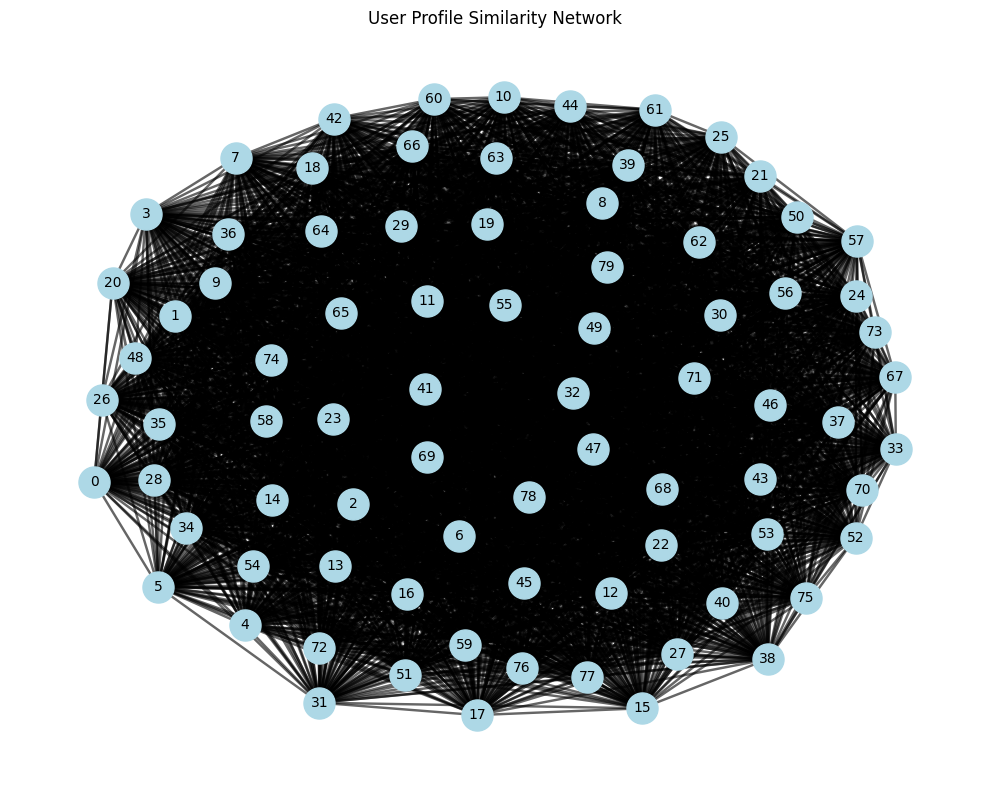

In [101]:
# Assuming you already have a similarity matrix from compute_similarity_matrix
# similarity_df = compute_similarity_matrix(user_profiles)

G = build_similarity_network(similarity_df, threshold=0.8)
visualize_similarity_network(G)


In [119]:
def get_top_k_similar_profiles(similarity_df: pd.DataFrame, consol_profiles: list, k: int = 5):
    """
    Returns the top-k user profiles with the highest total similarity to others.

    Parameters:
        similarity_df: DataFrame containing similarity scores.
        consol_profiles: List of original profile dicts.
        k: Number of top profiles to return.

    Returns:
        List of top-k profile dicts.
    """
    print(len(consol_profiles))
    similarity_scores = similarity_df.copy()

    # Exclude similarity values that are 0 or 1
    filtered_scores = similarity_scores.map(lambda x: x if 0 < x < 1 else 0.0)

    # Sum the filtered similarity scores per profile
    total_similarity = filtered_scores.sum(axis=1)

    # Get top k user_ids by similarity score
    top_k_ids = total_similarity.sort_values(ascending=False).head(k).index.tolist()

    print(top_k_ids)
    
    # Match user_ids back to consol_profiles
    # top_k_profiles = [profile for profile in consol_profiles if profile["basic_info"]["user_id"] in top_k_ids]
    top_k_profiles = []
    for i in top_k_ids:
        top_k_profiles.append(consol_profiles[i])
    
    return top_k_profiles


In [120]:
top_5_profiles = get_top_k_similar_profiles(similarity_df, consol_profiles, k=5)
# print(top_5_profiles)
# Display basic info for verification
for profile in top_5_profiles:
    print(profile["basic_info"]["user_id"], "-", profile["basic_info"]["name"])


80
[76, 36, 2, 42, 24]
43d2b229-b9d1-47c7-9f40-d7d6e28fc9fc - Jamie Young
43d2b229-b9d1-47c7-9f40-d7d6e28fc9fc - Jamie Young
588e3866-8d46-45f0-b74b-13ab7ee961ed - Suzanne Schwartz
588e3866-8d46-45f0-b74b-13ab7ee961ed - Suzanne Schwartz
6c9799d2-dac3-4098-8fd3-1d0f7ae138bb - Jennifer Blair
